# Correction TP1 "Principal Component Analysis"

## 4. Decathlon data

In [2]:
# Libraries
from sklearn import decomposition
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load the data
data = pd.read_csv('villes.txt',sep=' ')
data

,janvier,février,mars,avril,mai,juin,juillet,aout,septembre,octobre,novembre,décembre,lat,long,moy,amp
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.5,-0.34,13.3,15.4
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.2,-4.29,10.8,10.2
Clermont-Ferrand,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.5,3.05,10.9,16.8
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.1,5.43,11.0,18.6
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.4,3.04,9.7,14.7
Lyon,2.1,3.3,7.7,10.9,14.9,18.5,20.7,20.1,16.9,11.4,6.7,3.1,45.5,4.51,11.4,18.6
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.2,5.24,14.2,17.8
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.4,3.53,13.9,17.1
Nantes,5.0,5.3,8.4,10.8,13.9,17.2,18.8,18.6,16.4,12.2,8.2,5.5,47.1,-1.33,11.7,13.8
Nice,7.5,8.5,10.8,13.3,16.7,20.1,22.7,22.5,20.3,16.0,11.5,8.2,43.4,7.15,14.8,15.2


__Remark__: Here, we will assume that features are month (12 features), and samples are cities (15 samples). We could do an ACP by doing the opposite choice. This choice is "month point of view". We may predict the position of each city (columns long/lag) from the projection of each sample-city onto its principal components.

In [14]:
# Eliminate columns we do not use
my_data = data.drop(['lat', 'long', 'moy','amp'], axis=1)
X = my_data.values[:,0:12]

__Remark__: the columns eliminated with data.drop correspond to illustrative variables. 

In [13]:
# Preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

__Remark__: Values in X_scaled are supposed to be $0$ mean (per feature, i.e. column) and variance 1.

In [20]:
# Principal component analysis (first two components. 
# In order to consider V components, change the parameter n_components to V)
pca = decomposition.PCA(n_components=12)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
# Inertia, or relative variance, of each component. 
print("Relative variance (sum over ALL components would equal 1)")
print(pca.explained_variance_ratio_)

# Corresponding singular values
print("\n Corresponding singular values")
print(pca.singular_values_)

Relative variance (sum over ALL components would equal 1)
[7.98481632e-01 1.89701533e-01 5.83453368e-03 3.30622762e-03
 1.17044084e-03 6.65128070e-04 5.04104622e-04 1.45574414e-04
 1.24348177e-04 4.10111200e-05 2.38196449e-05 1.64684187e-06]

 Corresponding singular values
[11.98860683  5.84348149  1.0248005   0.77144084  0.4589982   0.34601019
  0.30122887  0.16187463  0.14960839  0.08591858  0.06547928  0.01721719]


__Remark__: "Relative variance" (also called inertia) gives the weight of each principal component onto the total variance in the data.

Text(0, 0.5, 'PC2')

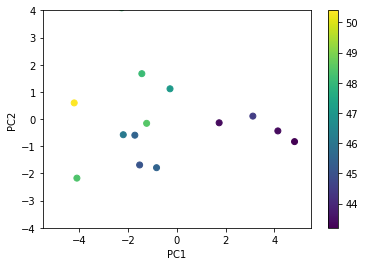

In [26]:
# Project X onto its two principal components
X_projected = pca.transform(X_scaled)

# Display each observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
    # colorer en utilisant la variable 'Rank'
    c=data.get('lat'))

plt.xlim([-5.5, 5.5])
plt.ylim([-4, 4])
plt.colorbar()
plt.xlabel("PC1")
plt.ylabel("PC2")

__Remark__: if c=data.get('lat'), colorbar represents the latitude. By doing this, we can see that the first component represents the latitude... Changping 'lat' into 'long' allows to show that the second component represents the longitude!

Text(0, 0.5, 'PC2')

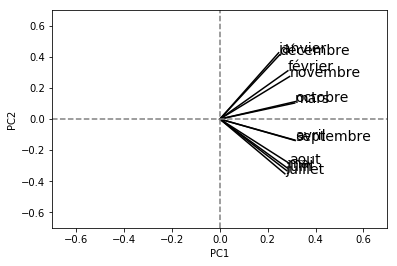

In [28]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color='k')
    # Display month name
    plt.text(x, y, data.columns[i], fontsize='14')

plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')
plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

plt.xlabel("PC1")
plt.ylabel("PC2")

__Remark__ : This figure represents the contributions of each month to the first two principal components. It also shows the correlations between variables. 